# Decision Tree Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import env
import math
import acquire
import prepare

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
df = acquire.get_titanic_data()
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
df = prepare.prep_titanic_data(df)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [5]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
df.age = df.age.fillna(df.age.mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       891 non-null    int64  
 1   passenger_id     891 non-null    int64  
 2   survived         891 non-null    int64  
 3   pclass           891 non-null    int64  
 4   sex              891 non-null    object 
 5   age              891 non-null    float64
 6   sibsp            891 non-null    int64  
 7   parch            891 non-null    int64  
 8   fare             891 non-null    float64
 9   embarked         891 non-null    object 
 10  class            891 non-null    object 
 11  embark_town      891 non-null    object 
 12  alone            891 non-null    int64  
 13  embarked_encode  891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [8]:
df = df.drop(columns=['Unnamed: 0', 'pclass', 'embarked', 'embarked_encode', 'passenger_id'])

In [9]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,Southampton,1


In [10]:
df = pd.get_dummies(df,['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,0,1


In [11]:
train, validate, test = prepare.split(df, stratify_by='survived')

In [12]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [13]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
583,36.000000,0,0,40.1250,1,1,0,0,0,0,0
165,9.000000,0,2,20.5250,0,1,0,1,0,0,1
50,7.000000,4,1,39.6875,0,1,0,1,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
306,29.699118,0,0,110.8833,1,0,0,0,0,0,0


In [14]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

### 1. Baseline & Baseline accuracy

In [15]:
# baseline prediction is equivalent to the ratio of not survived 
# in our train set over the total number of values.
# baseline = 329/534

In [16]:
train['baseline'] = 0

In [17]:
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton,baseline
583,0,36.000000,0,0,40.1250,1,1,0,0,0,0,0,0
165,1,9.000000,0,2,20.5250,0,1,0,1,0,0,1,0
50,0,7.000000,4,1,39.6875,0,1,0,1,0,0,1,0
259,1,50.000000,0,1,26.0000,0,0,1,0,0,0,1,0
306,1,29.699118,0,0,110.8833,1,0,0,0,0,0,0,0


In [18]:
(train.survived == train.baseline).mean()

0.6164658634538153

In [19]:
# Baseline accuracy:

baseline_accuracy = (train.survived == train.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 61.65%


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [20]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

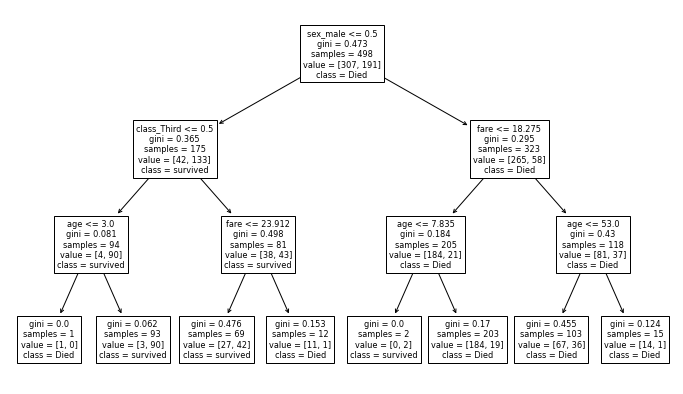

In [21]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['Died', 'survived'])
plt.show()

### 3. Evaluate Performance

In [22]:
tree1.score(X_train, y_train)

0.8253012048192772

The accuracy of our decision tree on our training set: 0.83

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


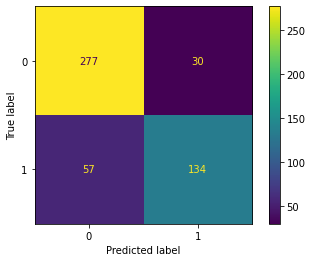

In [23]:
plot_confusion_matrix(tree1, X_train, y_train)

In [24]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [25]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


## 4. Calculate Metrics
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [26]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?

In [27]:
TN, FP, FN, TP

(277, 30, 57, 134)

In [28]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


**Sklearn is calling survival (1) our positive case**

In [29]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


### 5. Finding Optimal max_depth

In [30]:
# making a loop to create number of decision trees each with greater depth:
for i in range(1,21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    
    # Fit the model (on train only)
    tree = tree.fit(X_train, y_train)
    
    #Evaluate model's performance on train first
    y_predictions = tree1.predict(X_train)
    
    #Produce classification report on actual y values and each model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f" Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

 Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

 Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

 Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score  

### 6. Which model performs better on your in-sample data?

max_depth of 15 and above generates the highest accuracy

### 7. Validation - Which model performs best on your out-of-sample data, the validate set?



In [31]:
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.785047,0.080415
6,7,0.877510,0.747664,0.129846
7,8,0.897590,0.771028,0.126562
8,9,0.923695,0.771028,0.152667
9,10,0.937751,0.775701,0.162050


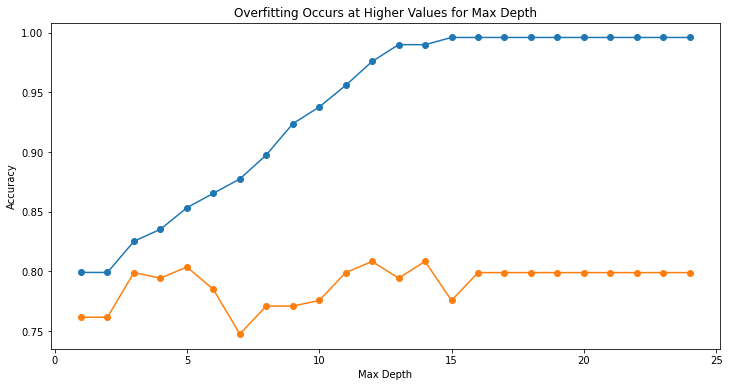

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [33]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.785047,0.080415
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


# Random Forest Exercises

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.
2. Evaluate your results using the model score, confusion matrix, and classification report.
3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.
5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [34]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [35]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Other,embark_town_Queenstown,embark_town_Southampton
583,36.000000,0,0,40.1250,1,1,0,0,0,0,0
165,9.000000,0,2,20.5250,0,1,0,1,0,0,1
50,7.000000,4,1,39.6875,0,1,0,1,0,0,1
259,50.000000,0,1,26.0000,0,0,1,0,0,0,1
306,29.699118,0,0,110.8833,1,0,0,0,0,0,0


In [36]:
X_train.shape, X_validate.shape, X_test.shape

((498, 11), (214, 11), (179, 11))

##### EXPLORATION NOTE: Previous exploration indicates that age, sex, fare, class, alone status and embark_town all are valid features to include in our analysis.

In [37]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [38]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, 
                            random_state=123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [40]:
# Feature importance
print(rf.feature_importances_)

[2.12370197e-01 5.47282154e-02 3.47804130e-02 2.53696522e-01
 2.09353487e-02 2.95016512e-01 1.79287464e-02 6.97923944e-02
 2.86967830e-04 1.40123282e-02 2.64523549e-02]


In [41]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [42]:
# Estimate probability
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.75929355, 0.24070645],
       [0.2463612 , 0.7536388 ],
       [0.9507381 , 0.0492619 ],
       [0.0208    , 0.9792    ],
       [0.01241379, 0.98758621],
       [0.82142262, 0.17857738],
       [0.87863043, 0.12136957],
       [0.95576234, 0.04423766],
       [0.97530773, 0.02469227],
       [1.        , 0.        ],
       [0.77567576, 0.22432424],
       [0.90112367, 0.09887633],
       [0.0333    , 0.9667    ],
       [0.67370867, 0.32629133],
       [0.85342756, 0.14657244],
       [0.59754483, 0.40245517],
       [0.96283399, 0.03716601],
       [0.0333908 , 0.9666092 ],
       [0.63117782, 0.36882218],
       [0.80304203, 0.19695797],
       [0.24282401, 0.75717599],
       [0.96827401, 0.03172599],
       [0.01      , 0.99      ],
       [0.02654423, 0.97345577],
       [0.59022058, 0.40977942],
       [0.9776132 , 0.0223868 ],
       [0.04333333, 0.95666667],
       [0.75052189, 0.24947811],
       [0.83122834, 0.16877166],
       [0.93779347, 0.06220653],
       [0.

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [43]:
# computing accuracy (model score)
rf.score(X_train, y_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
    .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [44]:
# confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,307,0
1,14,177


In [45]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.93      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [46]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [47]:
TN, FP, FN, TP

(307, 0, 14, 177)

In [48]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [49]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9718875502008032 

True Positive Rate/Sensitivity/Recall/Power: 0.9267015706806283 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 0.07329842931937172 

Precision/PPV: 1.0 

F1 Score: 0.9619565217391305 

Support (0): 307 

Support (1): 191


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [50]:
# Creating loop, increasing min_samples_leaf while simultaneously decreasing max_depth
for i in range(1, 10):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=(11-i), min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {11-i}, min_samples_leaf of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 10, min_samples_leaf of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.920732    0.970588  0.937751    0.945660      0.939853
recall       0.983713    0.863874  0.937751    0.923794      0.937751
f1-score     0.951181    0.914127  0.937751    0.932654      0.936970
support    307.000000  191.000000  0.937751  498.000000    498.000000

Tree with max depth of 9, min_samples_leaf of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.889231    0.895954  0.891566    0.892592      0.891809
recall       0.941368    0.811518  0.891566    0.876443      0.891566
f1-score     0.914557    0.851648  0.891566    0.883103      0.890429
support    307.000000  191.000000  0.891566  498.000000    498.000000

Tree with max depth of 8, min_samples_leaf of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.854227    0.909677  0.871486    0.881952      0.875494
recall       

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Looking at our random forest iterations, we observe that as max_depth decreases nad min_samples_leaf increases, accuracy diminishes. 
Our tree with max depth of 10 and min_samples_leaf of 1 shows greatest performance with accuracy of 93.8%

In [51]:
# same loop, now comparing in-sample to out-of-sample (validate set)
for i in range(1, 10):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=(11-i), min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": (11-i),
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,min_samples_leaf,difference
0,1,0.799197,0.761682,NaN,0.037515
1,2,0.799197,0.761682,NaN,0.037515
2,3,0.825301,0.799065,NaN,0.026236
3,4,0.835341,0.794393,NaN,0.040949
4,5,0.853414,0.803738,NaN,0.049675
5,6,0.865462,0.785047,NaN,0.080415
6,7,0.877510,0.747664,NaN,0.129846
7,8,0.897590,0.771028,NaN,0.126562
8,9,0.923695,0.771028,NaN,0.152667
9,10,0.937751,0.775701,NaN,0.162050


In [52]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,min_samples_leaf,difference
4,5,0.853414,0.803738,NaN,0.049675
2,3,0.825301,0.799065,NaN,0.026236
3,4,0.835341,0.794393,NaN,0.040949
29,5,0.839357,0.794393,6.0,0.044965
30,4,0.819277,0.785047,7.0,0.034230
31,3,0.819277,0.785047,8.0,0.034230
28,6,0.845382,0.785047,5.0,0.060335
5,6,0.865462,0.785047,NaN,0.080415
0,1,0.799197,0.761682,NaN,0.037515
1,2,0.799197,0.761682,NaN,0.037515


#### It seems the model with max_depth=5 (while min_samples_leaf = 6) has best performance on both train and validate